In [1]:
# Look at Alaska site uncertainty and quality (weighted mean, best value) for start, end, length

In [2]:
# imports
import rioxarray as rxr
import numpy as np

import xarray as xr
xr.set_options(use_bottleneck = False) # Just found out about this... I wonder if there are any impacts in code?
# https://github.com/pydata/xarray/issues/7336

import matplotlib.pyplot as plt

In [3]:
# # dask cluster
# from dask.distributed import LocalCluster
# cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
# client = cluster.get_client()
# client # Can open in other window by clicking 'Dashboard' link below

# Data

In [4]:
# data (start yearly uncertainty)

# start uncertainty 2018-2019
start_u_1819 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1819\HLS_Fmask_snow_start_u_winterYear1819_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
#start_u_1819

# start uncertainty 2019-2020
start_u_1920 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1920\HLS_Fmask_snow_start_u_winterYear1920_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2020-2021
start_u_2021 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2021\HLS_Fmask_snow_start_u_winterYear2021_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2021-2022
start_u_2122 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2122\HLS_Fmask_snow_start_u_winterYear2122_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2022-2023
start_u_2223 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2223\HLS_Fmask_snow_start_u_winterYear2223_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
start_u_2223

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(2436, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_start_u

In [5]:
# data (end yearly uncertainty)

# end uncertainty 2018-2019
end_u_1819 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1819\HLS_Fmask_snow_end_u_winterYear1819_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2019-2020
end_u_1920 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1920\HLS_Fmask_snow_end_u_winterYear1920_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2020-2021
end_u_2021 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2021\HLS_Fmask_snow_end_u_winterYear2021_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2021-2022
end_u_2122 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2122\HLS_Fmask_snow_end_u_winterYear2122_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2022-2023
end_u_2223 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2223\HLS_Fmask_snow_end_u_winterYear2223_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
end_u_2223

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(2436, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_u

In [6]:
# data (length yearly uncertainty)
# Don't need length uncertainty because it equals start + end

In [7]:
# data (metric weighted mean uncertainty 2018-2023)

# start
start_wmu = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_start_u_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end
end_wmu = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_u_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
end_wmu

# length 
# may not technically be equal to start + end here (because of weighting), but won't be on same scale as start and end...

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(2436, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_end_u_mn

In [8]:
# data (metric best value uncertainty 2018-2023)
# Did not produce, could get from corresponding yearly uncertainty product if needed

In [9]:
# data (metric weighted mean quality 2018-2023)

# start
start_wmq = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_start_q_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end
end_wmq = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_q_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# length
length_wmq = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_length_q_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
length_wmq

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(2436, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_length_q_mn

In [10]:
# data (metric best value quality 2018-2023)
# start
start_bvq = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_start_bvq_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end
end_bvq = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_bvq_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# length
length_bvq = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_length_bvq_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
length_bvq

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(2436, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      snow_length_bvq

# Mean +- SD, and % good 
% Good: uncertainty <= 7.5, quality >= 0.75

## Start Uncertainty

In [11]:
c = start_u_1819.compute()
print('Start Uncertainty (2018-2019) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2018-2019) = 43.8 ± 31.3; % Good = 37.7%


In [12]:
c = start_u_1920.compute()
print('Start Uncertainty (2019-2020) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2019-2020) = 3.9 ± 8.1; % Good = 94.4%


In [13]:
c = start_u_2021.compute()
print('Start Uncertainty (2020-2021) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2020-2021) = 5.8 ± 7.5; % Good = 84.3%


In [14]:
c = start_u_2122.compute()
print('Start Uncertainty (2021-2022) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2021-2022) = 4.7 ± 3.1; % Good = 96.6%


In [15]:
c = start_u_2223.compute()
print('Start Uncertainty (2022-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (2022-2023) = 4.4 ± 10.0; % Good = 93.5%


In [16]:
c = start_wmu.compute()
print('Start Uncertainty (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Uncertainty (Weighted Mean 2018-2023) = 8.8 ± 4.2; % Good = 38.8%


## End Uncertainty

In [17]:
c = end_u_1819.compute()
print('End Uncertainty (2018-2019) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2018-2019) = 5.5 ± 3.6; % Good = 73.2%


In [18]:
c = end_u_1920.compute()
print('End Uncertainty (2019-2020) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2019-2020) = 1.9 ± 1.7; % Good = 98.3%


In [19]:
c = end_u_2021.compute()
print('End Uncertainty (2020-2021) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2020-2021) = 2.0 ± 4.4; % Good = 96.4%


In [20]:
c = end_u_2122.compute()
print('End Uncertainty (2021-2022) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2021-2022) = 4.5 ± 2.3; % Good = 98.8%


In [21]:
c = end_u_2223.compute()
print('End Uncertainty (2022-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (2022-2023) = 3.8 ± 3.1; % Good = 89.9%


In [22]:
c = end_wmu.compute()
print('End Uncertainty (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 1)) + ' ± ' + str(round(c.std().item(), 1)) + 
      '; % Good = ' + str(round((c <= 7.5).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Uncertainty (Weighted Mean 2018-2023) = 3.3 ± 1.4; % Good = 98.4%


## Weighted Mean Quality

In [23]:
c = start_wmq.compute()
print('Start Quality (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Quality (Weighted Mean 2018-2023) = 0.85 ± 0.04; % Good = 99.2%


In [24]:
c = end_wmq.compute()
print('End Quality (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Quality (Weighted Mean 2018-2023) = 0.89 ± 0.03; % Good = 99.2%


In [25]:
c = length_wmq.compute()
print('Length Quality (Weighted Mean 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Length Quality (Weighted Mean 2018-2023) = 0.84 ± 0.04; % Good = 98.3%


## Best Value Quality

In [26]:
c = start_bvq.compute()
print('Start Quality (Best Value 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Start Quality (Best Value 2018-2023) = 0.93 ± 0.03; % Good = 99.7%


In [27]:
c = end_bvq.compute()
print('End Quality (Best Value 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

End Quality (Best Value 2018-2023) = 0.96 ± 0.03; % Good = 100.0%


In [28]:
c = length_bvq.compute()
print('Length Quality (Best Value 2018-2023) = ' + str(round(c.mean().item(), 2)) + ' ± ' + str(round(c.std().item(), 2)) + 
      '; % Good = ' + str(round((c >= 0.75).sum().item() / c.notnull().sum().item() * 100, 1)) + '%')

Length Quality (Best Value 2018-2023) = 0.94 ± 0.03; % Good = 99.3%


# Box plots

## Uncertainty

In [29]:
# Start: Create appended arrays
start_u_ar = []

start_u_1819 = start_u_1819.compute().to_numpy().flatten()
start_u_1819 = start_u_1819[~np.isnan(start_u_1819)]
start_u_ar.append(start_u_1819)

start_u_1920 = start_u_1920.compute().to_numpy().flatten()
start_u_1920 = start_u_1920[~np.isnan(start_u_1920)]
start_u_ar.append(start_u_1920)

start_u_2021 = start_u_2021.compute().to_numpy().flatten()
start_u_2021 = start_u_2021[~np.isnan(start_u_2021)]
start_u_ar.append(start_u_2021)

start_u_2122 = start_u_2122.compute().to_numpy().flatten()
start_u_2122 = start_u_2122[~np.isnan(start_u_2122)]
start_u_ar.append(start_u_2122)

start_u_2223 = start_u_2223.compute().to_numpy().flatten()
start_u_2223 = start_u_2223[~np.isnan(start_u_2223)]
start_u_ar.append(start_u_2223)

start_wmu = start_wmu.compute().to_numpy().flatten()
start_wmu = start_wmu[~np.isnan(start_wmu)]
start_u_ar.append(start_wmu)

In [30]:
# Get % Good
start_good = []

start_good.append(str(round(np.sum(start_u_1819 <= 7.5) / len(start_u_1819) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_1920 <= 7.5) / len(start_u_1920) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_2021 <= 7.5) / len(start_u_2021) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_2122 <= 7.5) / len(start_u_2122) * 100)) + '%')
start_good.append(str(round(np.sum(start_u_2223 <= 7.5) / len(start_u_2223) * 100)) + '%')
start_good.append(str(round(np.sum(start_wmu <= 7.5) / len(start_wmu) * 100)) + '%')
start_good

['38%', '94%', '84%', '97%', '94%', '39%']

In [31]:
# End: Create appended arrays
end_u_ar = []

end_u_1819 = end_u_1819.compute().to_numpy().flatten()
end_u_1819 = end_u_1819[~np.isnan(end_u_1819)]
end_u_ar.append(end_u_1819)

end_u_1920 = end_u_1920.compute().to_numpy().flatten()
end_u_1920 = end_u_1920[~np.isnan(end_u_1920)]
end_u_ar.append(end_u_1920)

end_u_2021 = end_u_2021.compute().to_numpy().flatten()
end_u_2021 = end_u_2021[~np.isnan(end_u_2021)]
end_u_ar.append(end_u_2021)

end_u_2122 = end_u_2122.compute().to_numpy().flatten()
end_u_2122 = end_u_2122[~np.isnan(end_u_2122)]
end_u_ar.append(end_u_2122)

end_u_2223 = end_u_2223.compute().to_numpy().flatten()
end_u_2223 = end_u_2223[~np.isnan(end_u_2223)]
end_u_ar.append(end_u_2223)

end_wmu = end_wmu.compute().to_numpy().flatten()
end_wmu = end_wmu[~np.isnan(end_wmu)]
end_u_ar.append(end_wmu)

In [32]:
# Get % Good
end_good = []

end_good.append(str(round(np.sum(end_u_1819 <= 7.5) / len(end_u_1819) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_1920 <= 7.5) / len(end_u_1920) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_2021 <= 7.5) / len(end_u_2021) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_2122 <= 7.5) / len(end_u_2122) * 100)) + '%')
end_good.append(str(round(np.sum(end_u_2223 <= 7.5) / len(end_u_2223) * 100)) + '%')
end_good.append(str(round(np.sum(end_wmu <= 7.5) / len(end_wmu) * 100)) + '%')
end_good

['73%', '98%', '96%', '99%', '90%', '98%']

In [152]:
# plt.figure(figsize = (7, 7))

# ticks = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', 'Weighted\nMean']

# start_u_plot = plt.boxplot(start_u_ar, positions = np.array(np.arange(len(start_u_ar))) * 2 - 0.35, widths = 0.6, 
#                            medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
# end_u_plot = plt.boxplot(end_u_ar, positions = np.array(np.arange(len(end_u_ar))) * 2 + 0.35, widths = 0.6, 
#                          medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))

# def define_box_properties(plot_name, color_code, label):
#     for k, v in plot_name.items():
#         plt.setp(plot_name.get(k), color = color_code)
         
#     # use plot function to draw a small line to name the legend.
#     plt.plot([], c = color_code, label = label)
#     plt.legend(loc = 'upper right')

# define_box_properties(start_u_plot, '#D7191C', 'Start')
# define_box_properties(end_u_plot, '#2C7BB6', 'End')

# # for box in start_u_plot['boxes']:
# #     box.set(facecolor = 'white')

# # for m in start_u_plot['medians']:
# #     m.set_color('black')
# # for m in end_u_plot['medians']:
# #     m.set_color('black')

# plt.axhline(y = 7.5, color = 'black')

# plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)#, rotation = 45)

# #plt.xlim(-2, len(ticks) * 2)
# plt.ylim(-3, 51) # 100

# plt.ylabel('Uncertainty (± Days)')

# for i in range(6):
#     plt.annotate(start_good[i], xy = (i * 2 - 0.7, -2))
#     plt.annotate(end_good[i], xy = (i * 2 + 0.1, -2))

# plt.show()

In [153]:
# # Medians
# print('Start Uncertainty Median (2018-2019) = ' + str(np.median(start_u_1819)))
# print('Start Uncertainty Median (2019-2020) = ' + str(np.median(start_u_1920)))
# print('Start Uncertainty Median (2020-2021) = ' + str(np.median(start_u_2021)))
# print('Start Uncertainty Median (2021-2022) = ' + str(np.median(start_u_2122)))
# print('Start Uncertainty Median (2022-2023) = ' + str(np.median(start_u_2223)))
# print('Start Uncertainty (Weighted Mean 2018-2023) = ' + str(round(np.median(start_wmu), 1)))

In [156]:
# print('End Uncertainty Median (2018-2019) = ' + str(np.median(end_u_1819)))
# print('End Uncertainty Median (2019-2020) = ' + str(np.median(end_u_1920)))
# print('End Uncertainty Median (2020-2021) = ' + str(np.median(end_u_2021)))
# print('End Uncertainty Median (2021-2022) = ' + str(np.median(end_u_2122)))
# print('End Uncertainty Median (2022-2023) = ' + str(np.median(end_u_2223)))
# print('End Uncertainty (Weighted Mean 2018-2023) = ' + str(round(np.median(end_wmu), 1)))

## Quality

In [36]:
# Start: Create appended arrays

start_q_ar = []

start_wmq = start_wmq.compute().to_numpy().flatten()
start_wmq = start_wmq[~np.isnan(start_wmq)]
start_q_ar.append(start_wmq)

start_bvq = start_bvq.compute().to_numpy().flatten()
start_bvq = start_bvq[~np.isnan(start_bvq)]
start_q_ar.append(start_bvq)

In [37]:
# Get % Good
start_good_q = []

start_good_q.append(str(round(np.sum(start_wmq >= 0.75) / len(start_wmq) * 100)) + '%')
start_good_q.append(str(round(np.sum(start_bvq >= 0.75) / len(start_bvq) * 100)) + '%')
start_good_q

['99%', '100%']

In [38]:
# End: Create appended arrays

end_q_ar = []

end_wmq = end_wmq.compute().to_numpy().flatten()
end_wmq = end_wmq[~np.isnan(end_wmq)]
end_q_ar.append(end_wmq)

end_bvq = end_bvq.compute().to_numpy().flatten()
end_bvq = end_bvq[~np.isnan(end_bvq)]
end_q_ar.append(end_bvq)

In [39]:
# Get % Good
end_good_q = []

end_good_q.append(str(round(np.sum(end_wmq >= 0.75) / len(end_wmq) * 100)) + '%')
end_good_q.append(str(round(np.sum(end_bvq >= 0.75) / len(end_bvq) * 100)) + '%')
end_good_q

['99%', '100%']

In [40]:
# Length: Create appended arrays

length_q_ar = []

length_wmq = length_wmq.compute().to_numpy().flatten()
length_wmq = length_wmq[~np.isnan(length_wmq)]
length_q_ar.append(length_wmq)

length_bvq = length_bvq.compute().to_numpy().flatten()
length_bvq = length_bvq[~np.isnan(length_bvq)]
length_q_ar.append(length_bvq)

In [41]:
# Get % Good
length_good_q = []

length_good_q.append(str(round(np.sum(length_wmq >= 0.75) / len(length_wmq) * 100)) + '%')
length_good_q.append(str(round(np.sum(length_bvq >= 0.75) / len(length_bvq) * 100)) + '%')
length_good_q

['98%', '99%']

In [154]:
# plt.figure(figsize = (4, 7))

# ticks = ['Weighted Mean\n', 'Best Value\n']

# start_q_plot = plt.boxplot(start_q_ar, positions = np.array(np.arange(len(start_q_ar))) * 2.33 - 0.35, widths = 0.6, 
#                            medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
# end_q_plot = plt.boxplot(end_q_ar, positions = np.array(np.arange(len(end_q_ar))) * 2.33 + 0.35, widths = 0.6, 
#                          medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))
# length_q_plot = plt.boxplot(length_q_ar, positions = np.array(np.arange(len(length_q_ar))) * 2.33 + 1.05, widths = 0.6, 
#                          medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#7b32a8'))

# def define_box_properties(plot_name, color_code, label):
#     for k, v in plot_name.items():
#         plt.setp(plot_name.get(k), color = color_code)
         
#     # use plot function to draw a small line to name the legend.
#     plt.plot([], c = color_code, label = label)
#     plt.legend(loc = 'lower right')

# define_box_properties(start_q_plot, '#D7191C', 'Start')
# define_box_properties(end_q_plot, '#2C7BB6', 'End')
# define_box_properties(length_q_plot, '#7b32a8', 'Length')

# # for box in start_u_plot['boxes']:
# #     box.set(facecolor = 'white')

# # for m in start_u_plot['medians']:
# #     m.set_color('black')
# # for m in end_u_plot['medians']:
# #     m.set_color('black')

# plt.axhline(y = 0.75, color = 'black')

# plt.xticks(np.arange(len(end_q_ar)) * 2.33 + 0.35, ticks)#, rotation = 45)

# #plt.xlim(-2, len(ticks) * 2)
# plt.ylim(0.5, 1.03) # 100

# plt.ylabel('Quality')

# for i in range(2):
#     plt.annotate(start_good_q[i], xy = (i * 2.33 - 0.6, 1.01))
#     plt.annotate(end_good_q[i], xy = (i * 2.33 + 0.1, 1.01))
#     plt.annotate(length_good_q[i], xy = (i * 2.33 + 0.9, 1.01))

# plt.show()

## Combined

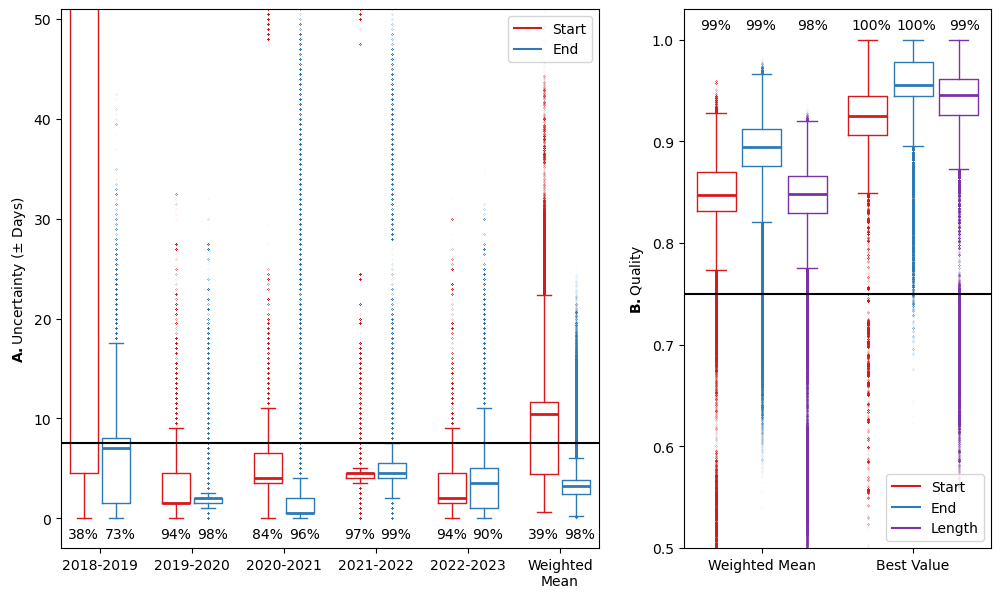

In [151]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, width_ratios = [7/11, 4/11], figsize = (12,7))

# Uncertainty plot
plt.sca(ax0)
ticks = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', 'Weighted\nMean']

start_u_plot = plt.boxplot(start_u_ar, positions = np.array(np.arange(len(start_u_ar))) * 2 - 0.35, widths = 0.6, 
                           medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
end_u_plot = plt.boxplot(end_u_ar, positions = np.array(np.arange(len(end_u_ar))) * 2 + 0.35, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color = color_code)
         
    plt.plot([], c = color_code, label = label)
    plt.legend(loc = 'upper right')

define_box_properties(start_u_plot, '#D7191C', 'Start')
define_box_properties(end_u_plot, '#2C7BB6', 'End')

plt.axhline(y = 7.5, color = 'black')

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

plt.ylim(-3, 51) # 100

plt.ylabel(r'$\bf{' + 'A.' + '}$' + 'Uncertainty (± Days)')
           
for i in range(6):
    plt.annotate(start_good[i], xy = (i * 2 - 0.7, -2))
    plt.annotate(end_good[i], xy = (i * 2 + 0.1, -2))

# Quality plot
plt.sca(ax1)

ticks = ['Weighted Mean\n', 'Best Value\n']

start_q_plot = plt.boxplot(start_q_ar, positions = np.array(np.arange(len(start_q_ar))) * 2.33 - 0.35, widths = 0.6, 
                           medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
end_q_plot = plt.boxplot(end_q_ar, positions = np.array(np.arange(len(end_q_ar))) * 2.33 + 0.35, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))
length_q_plot = plt.boxplot(length_q_ar, positions = np.array(np.arange(len(length_q_ar))) * 2.33 + 1.05, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#7b32a8'))

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color = color_code)
         
    plt.plot([], c = color_code, label = label)
    plt.legend(loc = 'lower right')

define_box_properties(start_q_plot, '#D7191C', 'Start')
define_box_properties(end_q_plot, '#2C7BB6', 'End')
define_box_properties(length_q_plot, '#7b32a8', 'Length')

plt.axhline(y = 0.75, color = 'black')

plt.xticks(np.arange(len(end_q_ar)) * 2.33 + 0.35, ticks)

plt.ylim(0.5, 1.03) # 100

plt.ylabel(r'$\bf{' + 'B.' + '}$' + 'Quality')

for i in range(2):
    plt.annotate(start_good_q[i], xy = (i * 2.33 - 0.6, 1.01))
    plt.annotate(end_good_q[i], xy = (i * 2.33 + 0.1, 1.01))
    plt.annotate(length_good_q[i], xy = (i * 2.33 + 0.9, 1.01))


plt.show()

fig.get_figure().savefig('Alaska_uncertaintyQuality.tif', dpi = 300, bbox_inches = 'tight')

In [155]:
# Medians
print('Start Uncertainty Median (2018-2019) = ' + str(np.median(start_u_1819)))
print('Start Uncertainty Median (2019-2020) = ' + str(np.median(start_u_1920)))
print('Start Uncertainty Median (2020-2021) = ' + str(np.median(start_u_2021)))
print('Start Uncertainty Median (2021-2022) = ' + str(np.median(start_u_2122)))
print('Start Uncertainty Median (2022-2023) = ' + str(np.median(start_u_2223)))
print('Start Uncertainty (Weighted Mean 2018-2023) = ' + str(round(np.median(start_wmu), 1)))

Start Uncertainty Median (2018-2019) = 67.0
Start Uncertainty Median (2019-2020) = 1.5
Start Uncertainty Median (2020-2021) = 4.0
Start Uncertainty Median (2021-2022) = 4.5
Start Uncertainty Median (2022-2023) = 2.0
Start Uncertainty (Weighted Mean 2018-2023) = 10.5


In [157]:
print('End Uncertainty Median (2018-2019) = ' + str(np.median(end_u_1819)))
print('End Uncertainty Median (2019-2020) = ' + str(np.median(end_u_1920)))
print('End Uncertainty Median (2020-2021) = ' + str(np.median(end_u_2021)))
print('End Uncertainty Median (2021-2022) = ' + str(np.median(end_u_2122)))
print('End Uncertainty Median (2022-2023) = ' + str(np.median(end_u_2223)))
print('End Uncertainty (Weighted Mean 2018-2023) = ' + str(round(np.median(end_wmu), 1)))

End Uncertainty Median (2018-2019) = 7.0
End Uncertainty Median (2019-2020) = 2.0
End Uncertainty Median (2020-2021) = 0.5
End Uncertainty Median (2021-2022) = 4.5
End Uncertainty Median (2022-2023) = 3.5
End Uncertainty (Weighted Mean 2018-2023) = 3.2


In [162]:
print('Start Weighted Mean Quality Median = ' + str(round(np.median(start_wmq), 2)))
print('End Weighted Mean Quality Median = ' + str(round(np.median(end_wmq), 2)))
print('Length Weighted Mean Quality Median = ' + str(round(np.median(length_wmq), 2)))

Start Weighted Mean Quality Median = 0.85
End Weighted Mean Quality Median = 0.89
Length Weighted Mean Quality Median = 0.85


In [163]:
print('Start Best Value Quality Median = ' + str(round(np.median(start_bvq), 2)))
print('End Best Value Quality Median = ' + str(round(np.median(end_bvq), 2)))
print('Length Best Value Quality Median = ' + str(round(np.median(length_bvq), 2)))

Start Best Value Quality Median = 0.92
End Best Value Quality Median = 0.96
Length Best Value Quality Median = 0.95
